# Libraries 

In [229]:
# Full modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

In [486]:
# Specific functions

from PIL import Image
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import image

# Data import and augmentation

## Data import

### Import data

#### file location

In [258]:
# Training images location
benign_train = glob('data/train/benign/*.jpg')
malignant_train = glob('data/train/malignant/*.jpg')

# Test images location
benign_test = glob('data/test/benign/*.jpg')
malignant_test = glob('data/test/malignant/*.jpg')

#### Import images and convert to numpy array

In [259]:
# Training images
X_benign_train = np.array([np.array(Image.open(file).resize((32,32)).convert('RGB')) for file in benign_train], dtype = 'uint8')
X_malignant_train = np.array([np.array(Image.open(file).resize((32,32)).convert('RGB')) for file in malignant_train], dtype = 'uint8')
X_benign_train_large = np.array([np.array(Image.open(file).resize((64,64)).convert('RGB')) for file in benign_train], dtype = 'uint8')
X_malignant_train_large = np.array([np.array(Image.open(file).resize((64,64)).convert('RGB')) for file in malignant_train], dtype = 'uint8')

# Test images
X_benign_test = np.array([np.asarray(Image.open(file).resize((32,32)).convert('RGB')) for file in benign_test], dtype = 'uint8')
X_malignant_test = np.array([np.asarray(Image.open(file).resize((32,32)).convert('RGB')) for file in malignant_test], dtype = 'uint8')
X_benign_test_large = np.array([np.asarray(Image.open(file).resize((64,64)).convert('RGB')) for file in benign_test], dtype = 'uint8')
X_malignant_test_large = np.array([np.asarray(Image.open(file).resize((64,64)).convert('RGB')) for file in malignant_test], dtype = 'uint8')

### Create target labels

In [260]:
# Training target labes
y_benign_train = np.zeros(X_benign_train.shape[0], dtype = 'int')
y_malignant_train = np.ones(X_malignant_train.shape[0], dtype = 'int')
y_benign_train_large = np.zeros(X_benign_train.shape[0], dtype = 'int')
y_malignant_train_large = np.ones(X_malignant_train.shape[0], dtype = 'int')

# Test target labels
y_benign_test = np.zeros(X_benign_test.shape[0], dtype = 'int')
y_malignant_test = np.ones(X_malignant_test.shape[0], dtype = 'int')
y_benign_test_large = np.zeros(X_benign_test.shape[0], dtype = 'int')
y_malignant_test_large = np.ones(X_malignant_test.shape[0], dtype = 'int')

### Merge the data

In [261]:
# Train Data
X_train = np.concatenate((X_benign_train, X_malignant_train), axis = 0)
y_train = np.concatenate((y_benign_train, y_malignant_train), axis = 0)
X_train_large = np.concatenate((X_benign_train_large, X_malignant_train_large), axis = 0)
y_train_large = np.concatenate((y_benign_train_large, y_malignant_train_large), axis = 0)

# Test Data
X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)
X_test_large = np.concatenate((X_benign_test_large, X_malignant_test_large), axis = 0)
y_test_large = np.concatenate((y_benign_test_large, y_malignant_test_large), axis = 0)

## Data exploration

### Check shape of my data

In [262]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of X_train_large: ", X_train_large.shape)
print("Shape of y_train_large: ", y_train_large.shape)
print("Shape of X_test_large: ", X_test_large.shape)
print("Shape of y_test_large: ", y_test_large.shape)

Shape of X_train:  (2637, 32, 32, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 32, 32, 3)
Shape of y_test:  (660,)
Shape of X_train_large:  (2637, 64, 64, 3)
Shape of y_train_large:  (2637,)
Shape of X_test_large:  (660, 64, 64, 3)
Shape of y_test_large:  (660,)


### Visualize test and training data

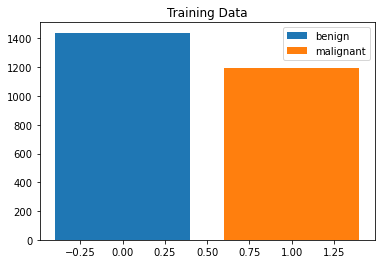

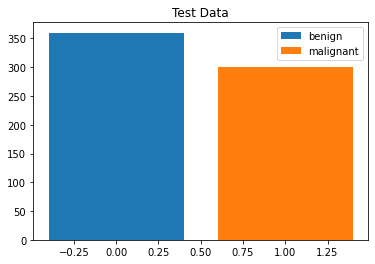

In [427]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

### Check some of the data

In [152]:
class_names = [
    'Benign',
    'Malignant'
]

In [153]:
# Random a picture entry
img_id = np.random.randint(len(X_train))

Text(0.5, 1.0, 'Malignant')

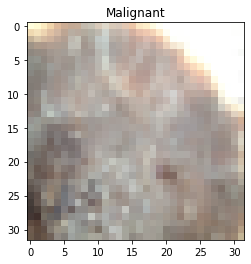

In [154]:
# Sample from small set of images
plt.imshow(X_train[img_id])
plt.title(class_names[y_train[img_id]])

Text(0.5, 1.0, 'Malignant')

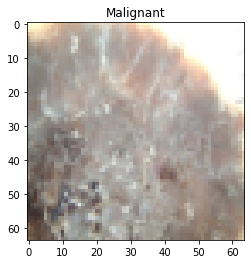

In [155]:
# Sample from large set
plt.imshow(X_train_large[img_id])
plt.title(class_names[y_train[img_id]])

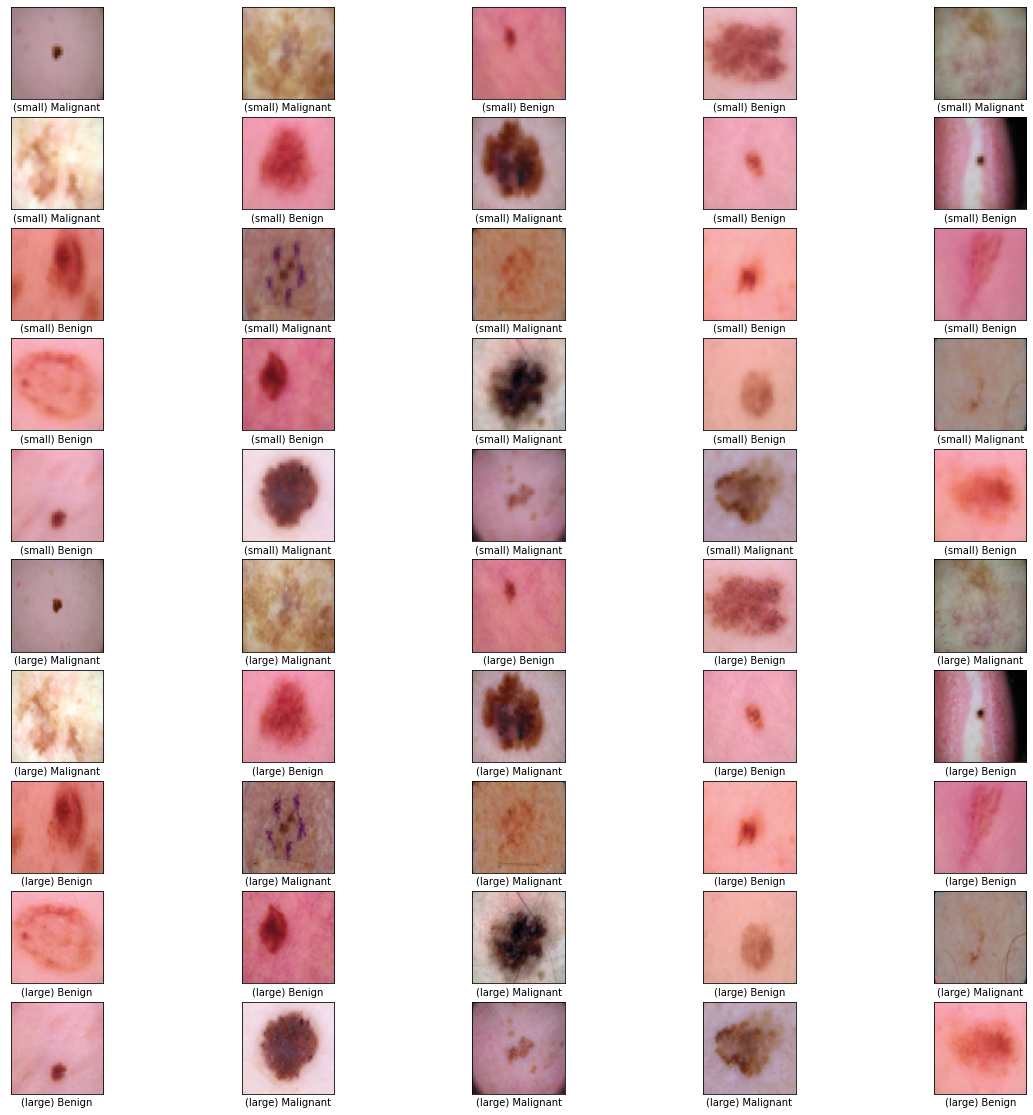

In [428]:
# top 25 are 32 x 32 and bottom 25 are 64 x 64
plt.figure(figsize=(20,20))
for i in range(25):
    img_id = np.random.randint(len(X_train))
    plt.subplot(10,5,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[img_id])
    plt.xlabel('(small) ' + class_names[y_train[img_id]])
    plt.subplot(10,5,26+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_large[img_id])
    plt.xlabel('(large) ' + class_names[y_train[img_id]])
plt.show()

## Data prep for model (shuffle and normalization)

### Shuffle the data

##### Shuffle train data set

In [263]:
# create shuffle array
shuff = np.arange(X_train.shape[0])

# shuffle array
np.random.shuffle(shuff)

# shuffle data with new array
X_train = X_train[shuff]
y_train = y_train[shuff]
X_train_large = X_train_large[shuff]
y_train_large = y_train_large[shuff]

#### Shuffle test data set

In [264]:
# create shuffle array
shuff = np.arange(X_test.shape[0])

# shuffle array
np.random.shuffle(shuff)

# shuffle data with new array
X_test = X_test[shuff]
y_test = y_test[shuff]
X_test_large = X_test_large[shuff]
y_test_large = y_test_large[shuff]

### Normalization

In [265]:
X_train_norm = X_train/255
X_test_norm = X_test/255
X_train_norm_l = X_train_large/255
X_test_norm_l = X_test_large/255

### Convert target to categorical

In [266]:
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(y_train.flatten()))

In [267]:
# Convert the target to categorical (small)
y_train_cat = to_categorical(
    y_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test_cat = to_categorical(
    y_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [268]:
# Convert the target to categorical
y_train_cat_l = to_categorical(
    y_train_large,
    num_classes = num_classes,
    dtype = 'uint8')
y_test_cat_l = to_categorical(
    y_test_large,
    num_classes = num_classes,
    dtype = 'uint8')

# Models

## Libraries

In [489]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from keras.models import Sequential, Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import h5py
import visualkeras

## Functions

In [270]:
# Reduce learning rate on plateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)

In [271]:
# Reduce learning rate on plateau for combined training
learning_rate_reduction_all = ReduceLROnPlateau(
    monitor='accuracy', 
    patience=5, 
    verbose=1, 
    factor=0.5, 
    min_lr=1e-7
)

In [307]:
# Early Stopping
earlystopping = EarlyStopping(
    monitor="accuracy",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [448]:
def visulization(hist):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

In [331]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [381]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, class_names[l_id], a_id, class_names[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, class_names[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

## Models

### CNN 32

#### Build

In [463]:
model_cnn32 = Sequential()
model_cnn32.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model_cnn32.add(MaxPool2D(pool_size = (2, 2)))
model_cnn32.add(Dropout(0.25))
model_cnn32.add(Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
model_cnn32.add(MaxPool2D(pool_size = (2, 2)))
model_cnn32.add(Dropout(0.25))
model_cnn32.add(Conv2D(256, kernel_size = 3, activation = 'relu', padding = 'same'))
model_cnn32.add(MaxPool2D(pool_size = (2, 2)))
model_cnn32.add(Dropout(0.25))
model_cnn32.add(Flatten())
model_cnn32.add(Dense(512, activation = 'relu'))
model_cnn32.add(Dense(256, activation = 'relu'))
model_cnn32.add(Dense(128, activation = 'relu'))
model_cnn32.add(Dense(num_classes, activation = 'softmax'))

#### Summary

In [430]:
model_cnn32.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_68 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_70 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 dropout_69 (Dropout)        (None, 8, 8, 128)       

#### Compile

In [464]:
model_cnn32.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

#### Training

In [465]:
cnn_small_hist = model_cnn32.fit(
    X_train,
    y_train_cat,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 80,
    callbacks=[earlystopping, learning_rate_reduction],
    verbose = 0)


Epoch 00024: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 00033: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 00043: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.
Restoring model weights from the end of the best epoch: 44.
Epoch 00054: early stopping


#### Model Evaluation

In [466]:
score = model_cnn32.evaluate(X_test, y_test_cat, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

66/66 [==============================] - 1s 8ms/step - loss: 0.3985 - accuracy: 0.8212

Test loss: 0.398481, Test accuracy: 0.821212


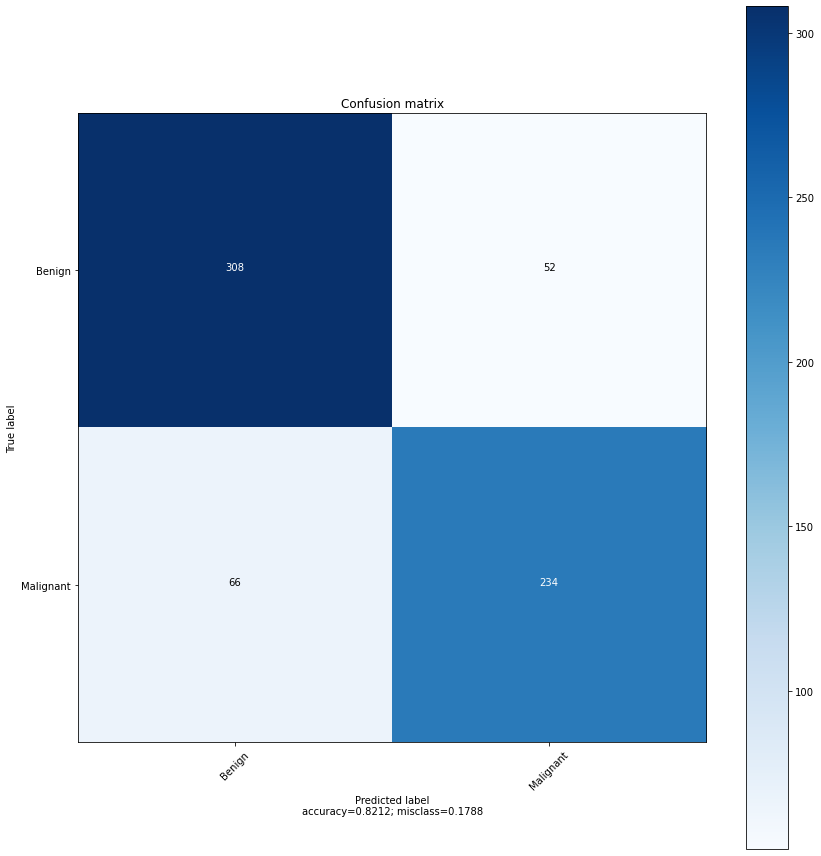

In [509]:
y_pred = np.argmax(model_cnn32.predict(X_test),axis=1)
y_test_target = np.array([x.argmax() for x in y_test_cat])
cm = confusion_matrix(y_test_target, y_pred)
plot_confusion_matrix(cm, class_names, normalize = False)

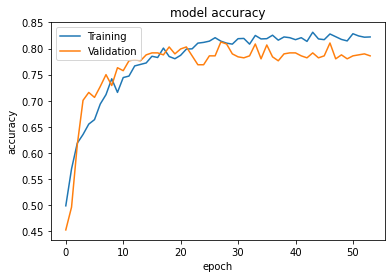

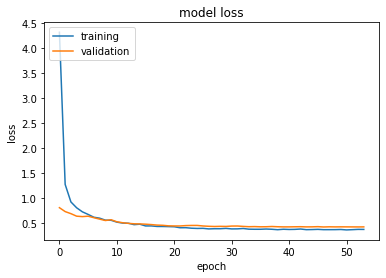

In [468]:
visulization(cnn_small_hist)

#### Model Visulization

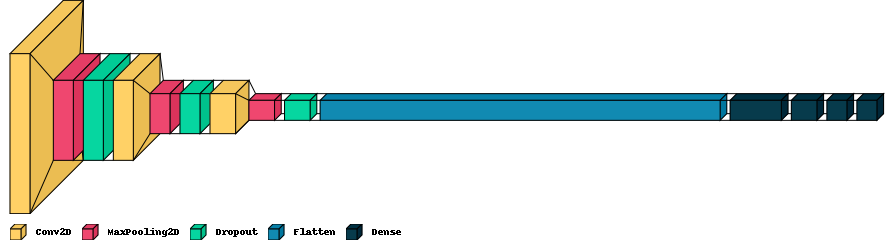

In [508]:
# Visualizing our model 
visualkeras.layered_view(model_cnn32, scale_xy = 5, legend=True)

(1, 32, 32, 3)


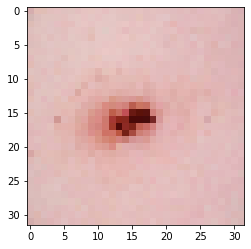

In [469]:
# Pre-processing the image
img = image.load_img('data/test/benign/1.jpg', target_size = (32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

(1, 32, 32, 64)


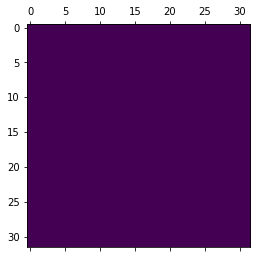

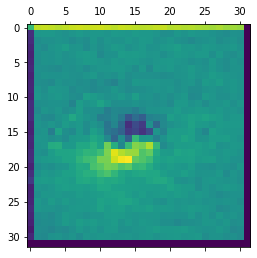

In [474]:
# Layer visulization
layer_outputs = [layer.output for layer in model_cnn32.layers[:8]]
activation_model = Model(inputs = model_cnn32.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations 
first_layer_activation = activations[0]
  
# shape of layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

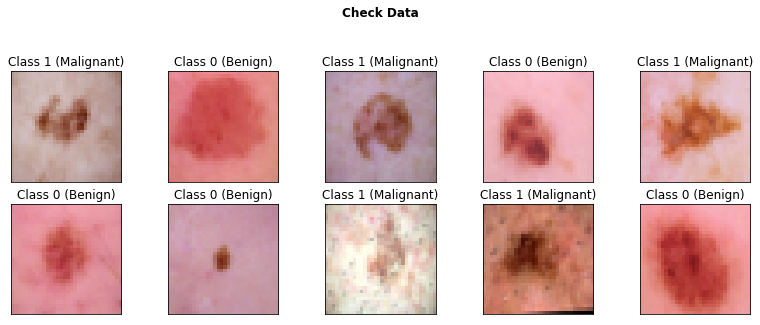

In [510]:
check_ten(X_test, y_pred, y_test_cat, compare = True) 

#### Saving the model

In [475]:
model_cnn32.save('cnn32_model')
print('Saved model to disk')

# Save model
cnn32_model_json = model_cnn32.to_json()
with open('cnn32_model.json', 'w') as json_file:
     json_file.write(cnn32_model_json)

# Save weights
model_cnn32.save_weights('cnn32_model.h5')
print("Saved model to disk")

INFO:tensorflow:Assets written to: cnn32_model/assets
Saved model to disk
Saved model to disk


### CNN 64

#### Build

In [478]:
model_cnn64 = Sequential()
model_cnn64.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (64, 64, 3)))
model_cnn64.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (64, 64, 3)))
model_cnn64.add(MaxPool2D(pool_size = (2, 2)))
model_cnn64.add(Dropout(0.25))
model_cnn64.add(Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
model_cnn64.add(MaxPool2D(pool_size = (2, 2)))
model_cnn64.add(Dropout(0.25))
model_cnn64.add(Conv2D(256, kernel_size = 3, activation = 'relu', padding = 'same'))
model_cnn64.add(MaxPool2D(pool_size = (2, 2)))
model_cnn64.add(Dropout(0.25))
model_cnn64.add(Flatten())
model_cnn64.add(Dense(512, activation = 'relu'))
model_cnn64.add(Dense(256, activation = 'relu'))
model_cnn64.add(Dense(128, activation = 'relu'))
model_cnn64.add(Dense(num_classes, activation = 'softmax'))

#### Summary

In [343]:
model_cnn64.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_66 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_65 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                

#### Compile

In [479]:
model_cnn64.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

#### Training

In [480]:
cnn_large_hist = model_cnn64.fit(
    X_train_large,
    y_train_cat_l,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 80,
    callbacks=[earlystopping, learning_rate_reduction],
    verbose = 0)


Epoch 00014: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.
Restoring model weights from the end of the best epoch: 23.
Epoch 00033: early stopping


#### Model Evaluation

In [481]:
score = model_cnn64.evaluate(X_test_large, y_test_cat_l, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

66/66 [==============================] - 3s 40ms/step - loss: 0.4297 - accuracy: 0.7712

Test loss: 0.429715, Test accuracy: 0.771212


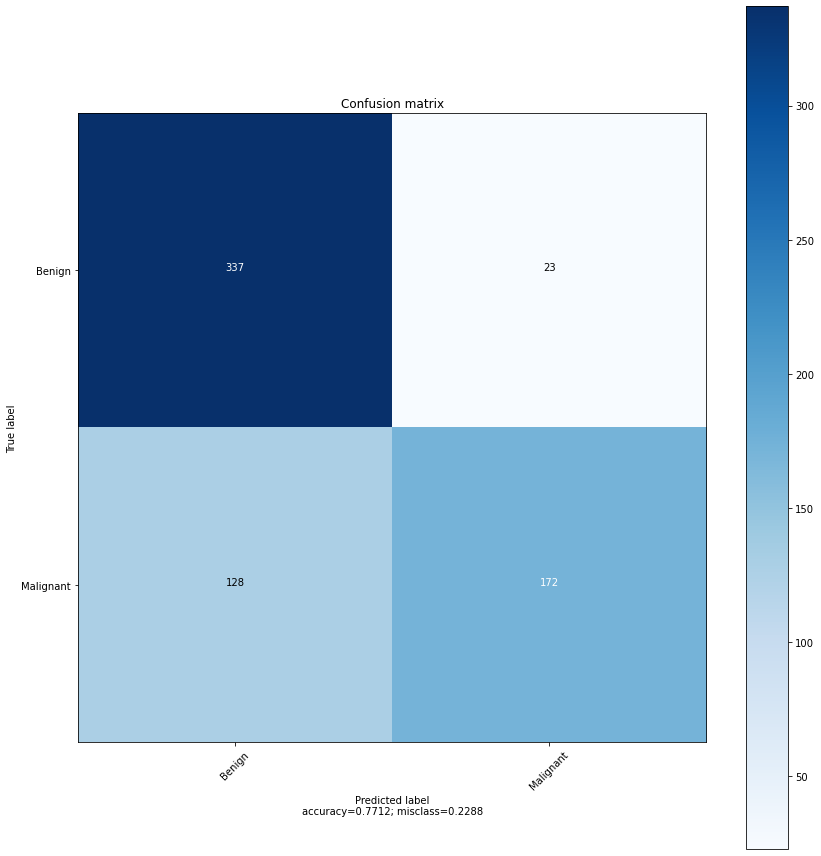

In [505]:
y_pred = np.argmax(model_cnn64.predict(X_test_large),axis=1)
y_test_target = np.array([x.argmax() for x in y_test_cat])
cm = confusion_matrix(y_test_target, y_pred)
plot_confusion_matrix(cm, class_names, normalize = False)

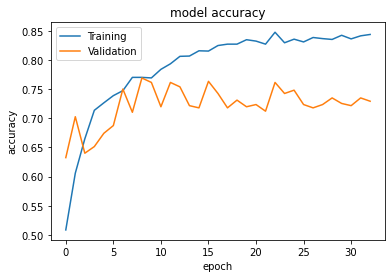

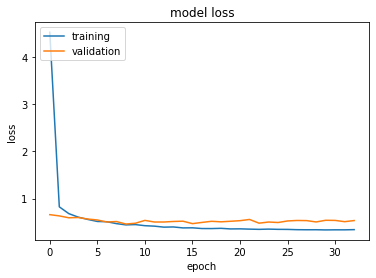

In [507]:
visulization(cnn_large_hist)

#### Model Visulization

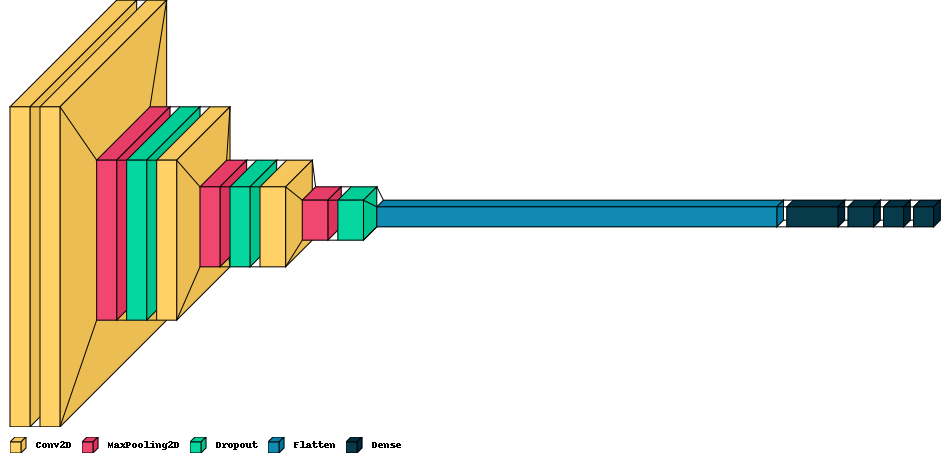

In [503]:
# Visualizing our model 
visualkeras.layered_view(model_cnn64, scale_xy = 5, legend=True)

(1, 64, 64, 3)


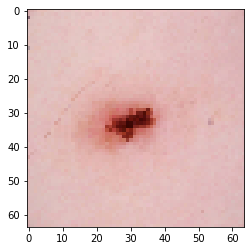

In [483]:
# Pre-processing the image
img = image.load_img('data/test/benign/1.jpg', target_size = (64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

(1, 64, 64, 64)


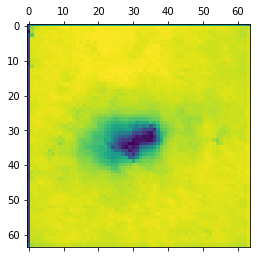

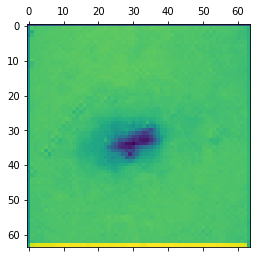

In [484]:
from keras import models
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model_cnn64.layers[:8]]
activation_model = Model(inputs = model_cnn64.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations of first layer
first_layer_activation = activations[0]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

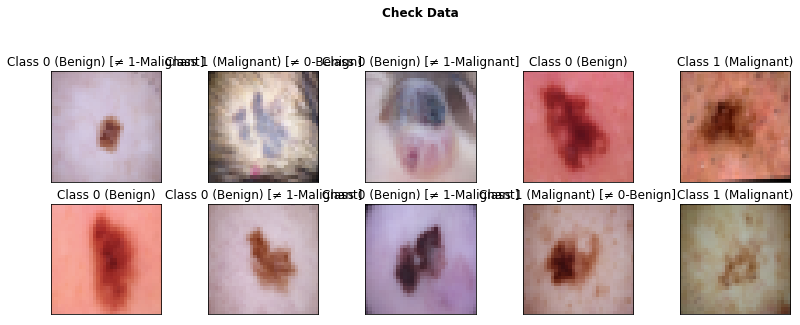

In [506]:
check_ten(X_test, y_pred, y_test_cat, compare = True) 

#### Saving the model

In [356]:
model_cnn64.save('cnn64_model')
print('Saved model to disk')

# Save model
cnn64_model_json = model_cnn64.to_json()
with open('cnn64_model.json', 'w') as json_file:
     json_file.write(cnn64_model_json)

# Save weights
model_cnn32.save_weights('cnn64_model.h5')
print("Saved model to disk")

INFO:tensorflow:Assets written to: cnn64_model/assets
Saved model to disk
Saved model to disk


### ResNet50 32

#### Building

In [357]:
model_rn50_32 = ResNet50(
    include_top=True,
     weights= None,
     input_tensor=None,
     input_shape=(32,32,3),
     pooling='avg',
     classes=2
)

#### Sumary

In [358]:
model_rn50_32.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

#### Compiling

In [359]:
model_rn50_32.compile(optimizer = Adam(0.00001),
              loss = "binary_crossentropy", 
              metrics=["accuracy"])

#### Training

In [362]:
rn50_small_history = model_rn50_32.fit(
    X_train,
    y_train_cat,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 100,
    verbose = 0, 
    callbacks=[earlystopping, learning_rate_reduction]
)


Epoch 00007: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 00040: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.

Epoch 00045: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.

Epoch 00050: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-07.

Epoch 00055: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-07.

Epoch 00060: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-07.
Restoring model weights from the end of the best epoch: 51.
Epoch 00061: early stopping


#### Model Evaluation

In [363]:
score = model_rn50_32.evaluate(X_test, y_test_cat)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

21/21 [==============================] - 2s 65ms/step - loss: 0.5794 - accuracy: 0.7455

Test loss: 0.579428, Test accuracy: 0.745455


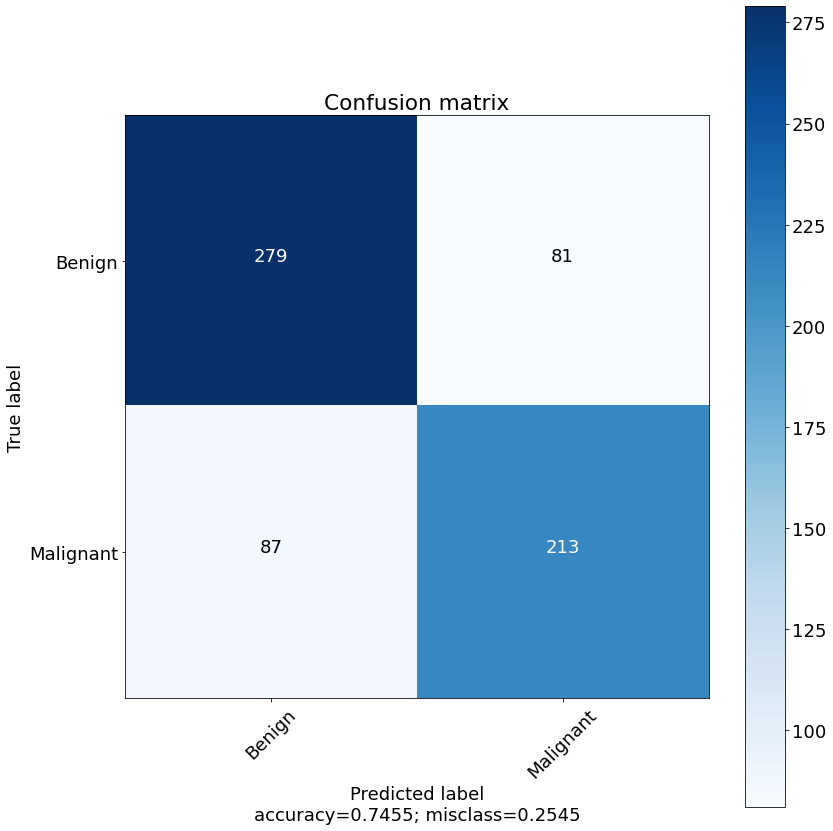

In [365]:
y_pred = np.argmax(model_rn50_32.predict(X_test),axis=1)
y_test_target = np.array([x.argmax() for x in y_test_cat])
cm = confusion_matrix(y_test_target, y_pred)
plot_confusion_matrix(cm, class_names, normalize = False)

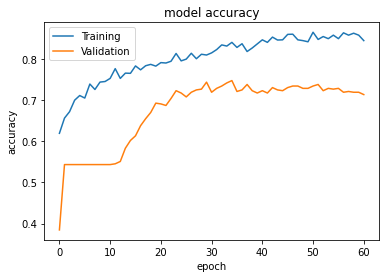

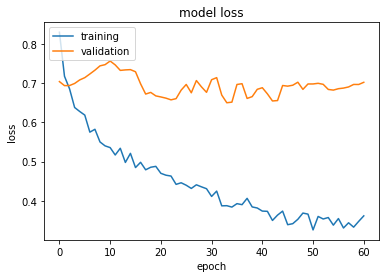

In [458]:
visulization(rn50_small_history)

#### Model Visulization

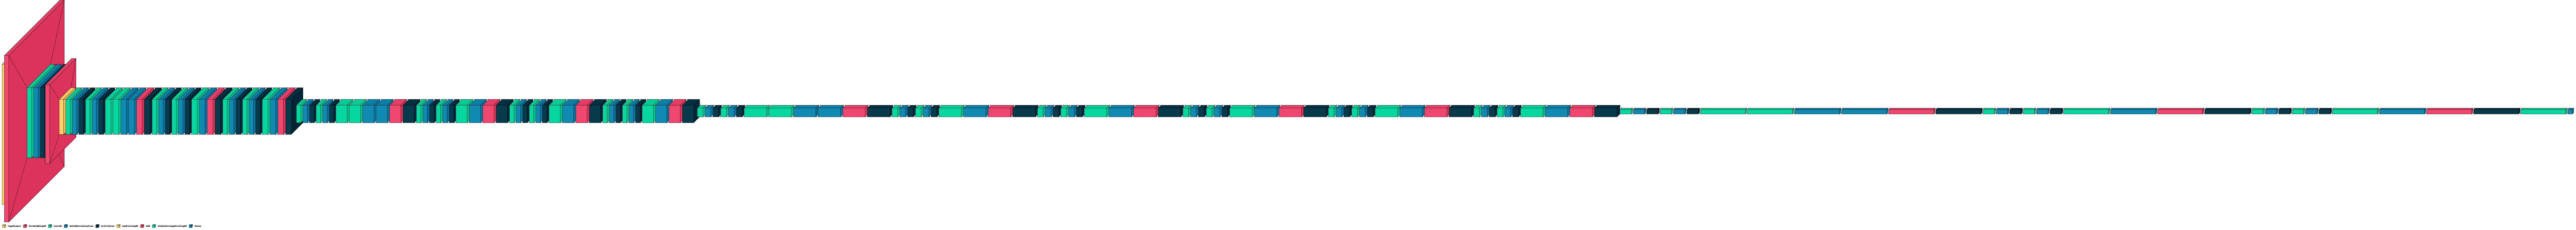

In [496]:
# Visualizing our model 
visualkeras.layered_view(model_rn50_32, scale_xy = 20, legend=True)

(1, 32, 32, 3)


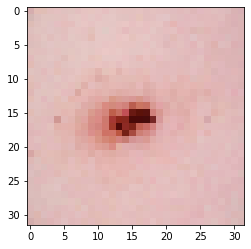

In [453]:
# Pre-processing the image
img = image.load_img('data/test/benign/1.jpg', target_size = (32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

(1, 16, 16, 64)


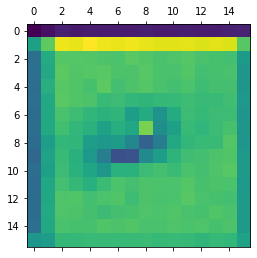

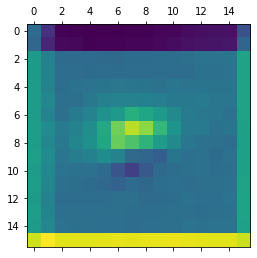

In [454]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model_rn50_32.layers[:8]]
activation_model = Model(inputs = model_rn50_32.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations of first layer
first_layer_activation = activations[2]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

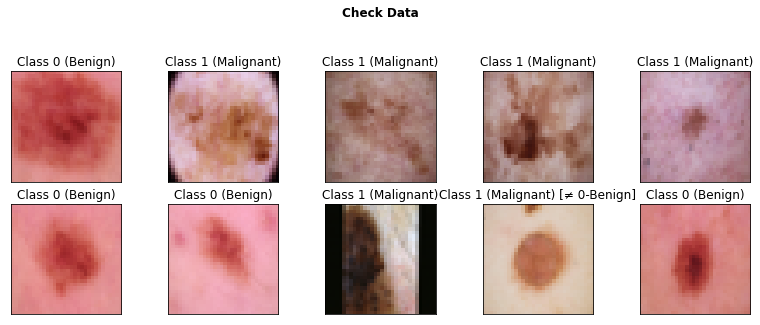

In [451]:
check_ten(X_test, y_pred, y_test_cat, compare = True) 

#### Saving the model

In [385]:
model_rn50_32.save('rn50_32_model')
print('Saved model to disk')

# Save model
rn50_32_model_json = model_rn50_32.to_json()
with open('rn50_32_model.json', 'w') as json_file:
     json_file.write(rn50_32_model_json)

# Save weights
model_rn50_32.save_weights('rn50_32_model.h5')
print("Saved model to disk")

INFO:tensorflow:Assets written to: rn50_32_model/assets


/opt/anaconda3/envs/Deeplearning/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/opt/anaconda3/envs/Deeplearning/lib/python3.8/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Saved model to disk
Saved model to disk


### ResNet50 64

#### Building

In [431]:
model_rn50_64 = ResNet50(
    include_top=True,
     weights= None,
     input_tensor=None,
     input_shape=(64,64,3),
     pooling='avg',
     classes=2
)

#### Sumary

In [432]:
model_rn50_64.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

#### Compiling

In [433]:
model_rn50_64.compile(optimizer = Adam(0.00001),
              loss = "binary_crossentropy", 
              metrics=["accuracy"])

#### Training

In [434]:
rn50_large_history = model_rn50_64.fit(
    X_train_large,
    y_train_cat_l,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 100,
    verbose = 0, 
    callbacks=[earlystopping, learning_rate_reduction]
)


Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 00011: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.

Epoch 00031: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.

Epoch 00036: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-07.

Epoch 00041: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-07.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-07.

Epoch 00051: ReduceLROnPlateau reducing learning rate to 1e-07.
Restoring model weights from the end of the best epoch: 56.
Epoch 00066: early stopping


#### Model Evaluation

In [435]:
score = model_rn50_64.evaluate(X_test_large, y_test_cat_l)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

21/21 [==============================] - 5s 210ms/step - loss: 0.4608 - accuracy: 0.7818

Test loss: 0.460845, Test accuracy: 0.781818


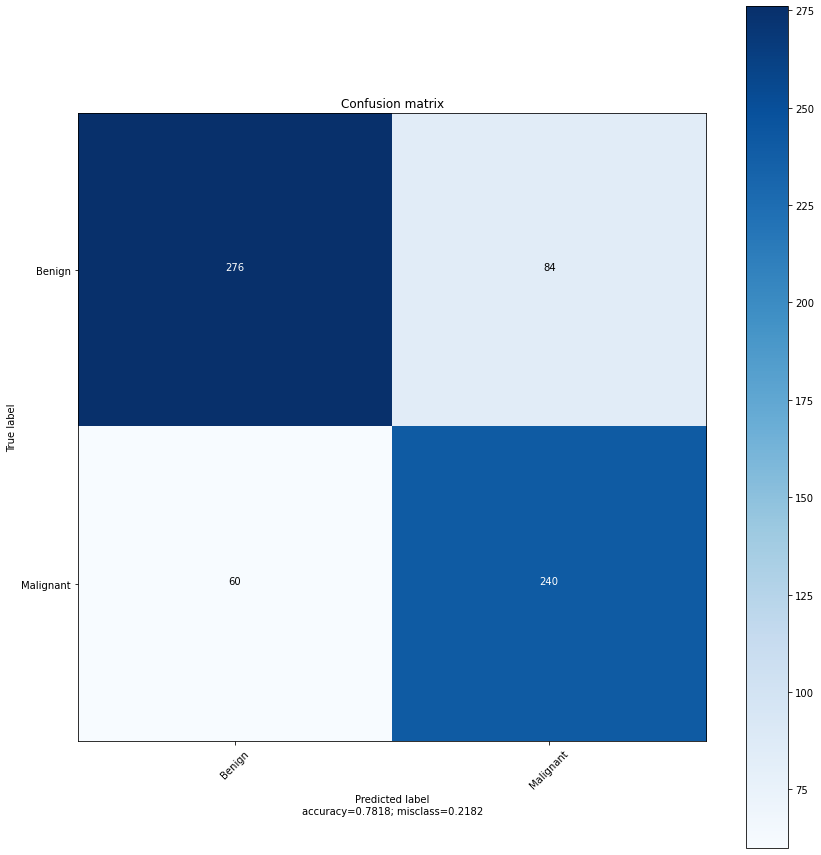

In [436]:
y_pred = np.argmax(model_rn50_64.predict(X_test_large),axis=1)
y_test_target = np.array([x.argmax() for x in y_test_cat_l])
cm = confusion_matrix(y_test_target, y_pred)
plot_confusion_matrix(cm, class_names, normalize = False)

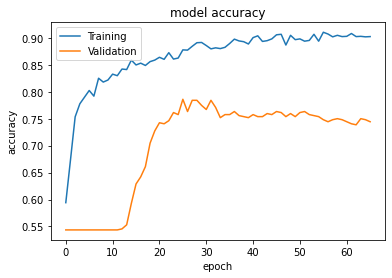

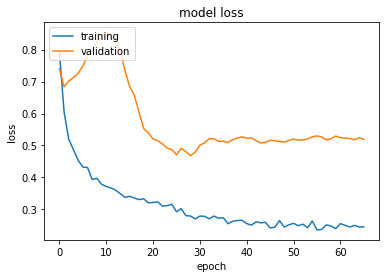

In [449]:
visulization(rn50_large_history)

#### Model Visulization

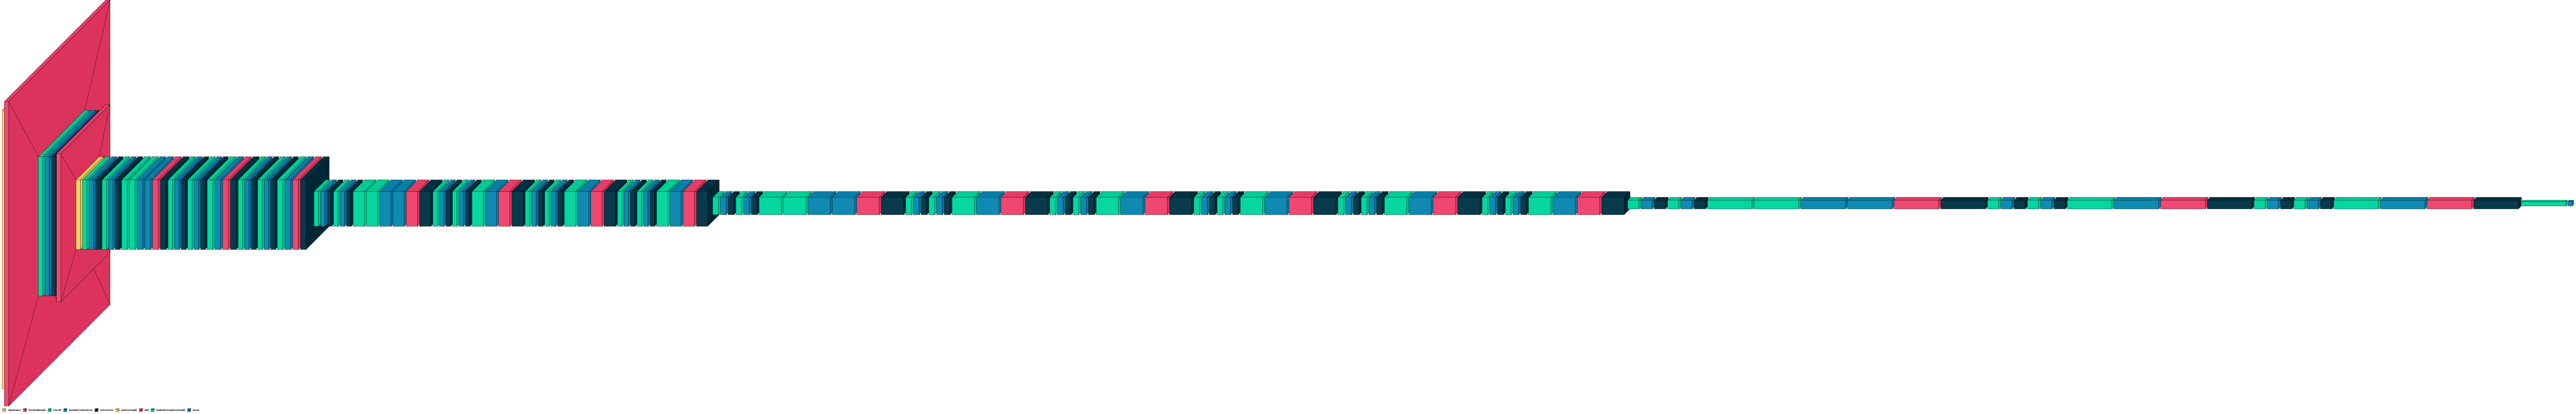

In [497]:
# Visualizing our model 
visualkeras.layered_view(model_rn50_64, scale_xy = 20, legend=True)

(1, 64, 64, 3)


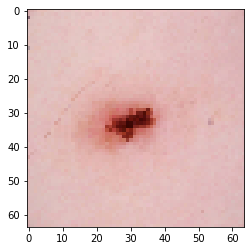

In [439]:
# Pre-processing the image
img = image.load_img('data/test/benign/1.jpg', target_size = (64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

(1, 32, 32, 64)


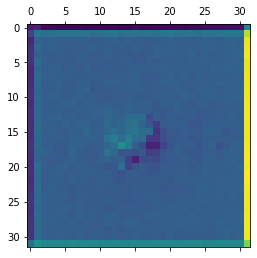

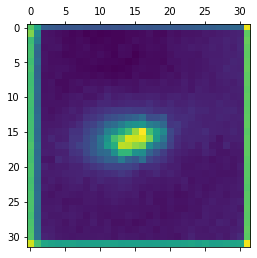

In [445]:
from keras import models
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model_rn50_64.layers[:8]]
activation_model = Model(inputs = model_rn50_64.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations of first layer
first_layer_activation = activations[2]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

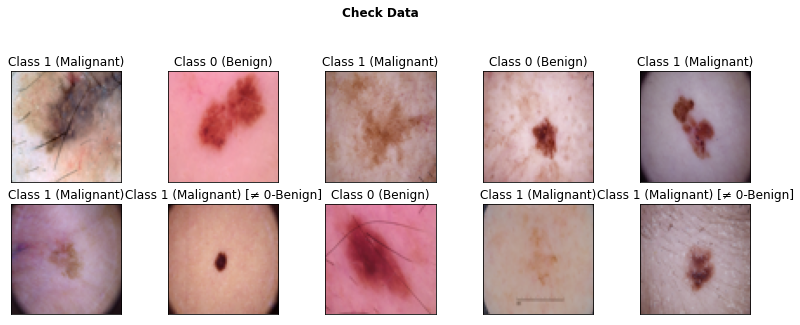

In [446]:
check_ten(X_test_large, y_pred, y_test_cat_l, compare = True) 

#### Saving the model

In [447]:
model_rn50_64.save('rn50_64_model')
print('Saved model to disk')

# Save model
rn50_64_model_json = model_rn50_64.to_json()
with open('rn50_64_model.json', 'w') as json_file:
     json_file.write(rn50_64_model_json)

# Save weights
model_rn50_64.save_weights('rn50_64_model.h5')
print("Saved model to disk")

INFO:tensorflow:Assets written to: rn50_64_model/assets


/opt/anaconda3/envs/Deeplearning/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/opt/anaconda3/envs/Deeplearning/lib/python3.8/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Saved model to disk
Saved model to disk


### VGG16 32

#### Build

In [386]:
model_vgg16_32 = VGG16(
    include_top=True,
     weights= None,
     input_tensor=None,
     input_shape=(32,32,3),
     pooling='avg',
     classes=2
)

#### Summary

In [388]:
model_vgg16_32.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

#### Compile

In [389]:
model_vgg16_32.compile(optimizer = Adam(0.00001),
              loss = "binary_crossentropy", 
              metrics=["accuracy"])

#### Training

In [390]:
vgg16_small_history = model_vgg16_32.fit(
    X_train,
    y_train_cat,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 100,
    verbose = 0, 
    callbacks=[earlystopping, learning_rate_reduction]
)


Epoch 00018: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.

Epoch 00035: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.

Epoch 00041: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-07.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-07.

Epoch 00051: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-07.

Epoch 00056: ReduceLROnPlateau reducing learning rate to 1e-07.
Restoring model weights from the end of the best epoch: 50.
Epoch 00060: early stopping


#### Model Evaluation

In [391]:
score = model_vgg16_32.evaluate(X_test, y_test_cat)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

21/21 [==============================] - 3s 104ms/step - loss: 0.3349 - accuracy: 0.8530

Test loss: 0.334918, Test accuracy: 0.853030


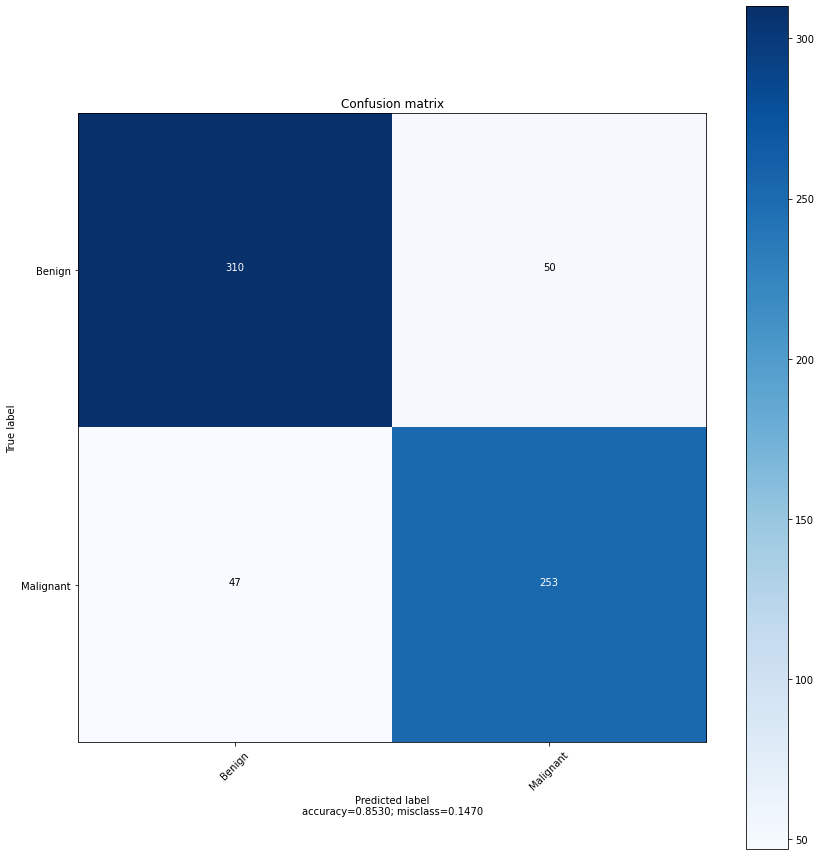

In [392]:
y_pred = np.argmax(model_vgg16_32.predict(X_test),axis=1)
y_test_target = np.array([x.argmax() for x in y_test_cat])
cm = confusion_matrix(y_test_target, y_pred)
plot_confusion_matrix(cm, class_names, normalize = False)

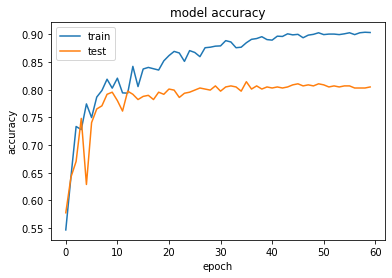

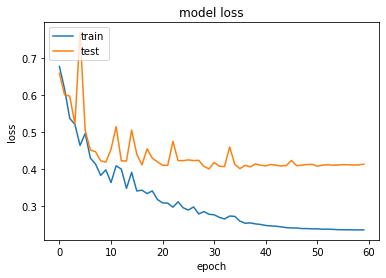

In [394]:
visulization(vgg16_small_history)

#### Model Visulization

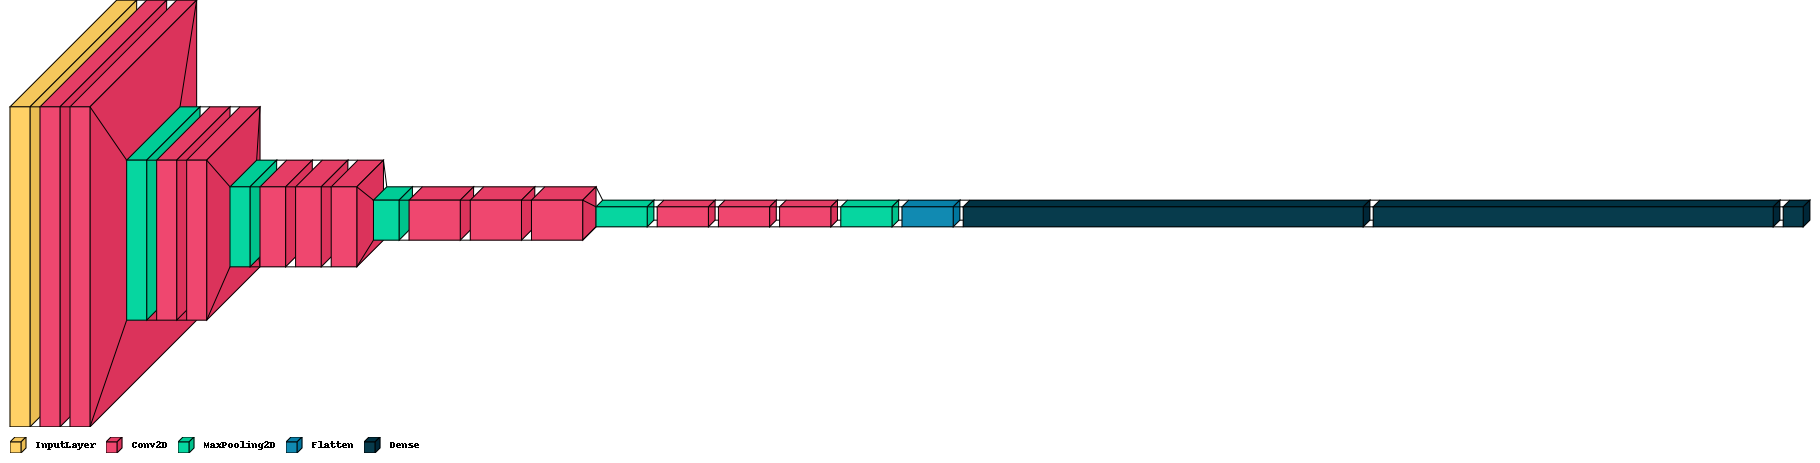

In [499]:
# Visualizing our model 
visualkeras.layered_view(model_vgg16_32, scale_xy = 10, legend=True)

(1, 32, 32, 3)


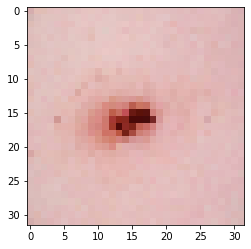

In [512]:
# Pre-processing the image
img = image.load_img('data/test/benign/1.jpg', target_size = (32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

(1, 32, 32, 64)


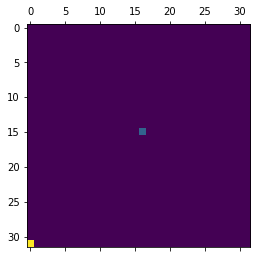

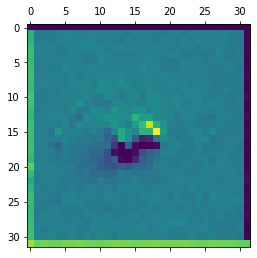

In [513]:
from keras import models
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model_vgg16_32.layers[:8]]
activation_model = Model(inputs = model_vgg16_32.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations of first layer
first_layer_activation = activations[1]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

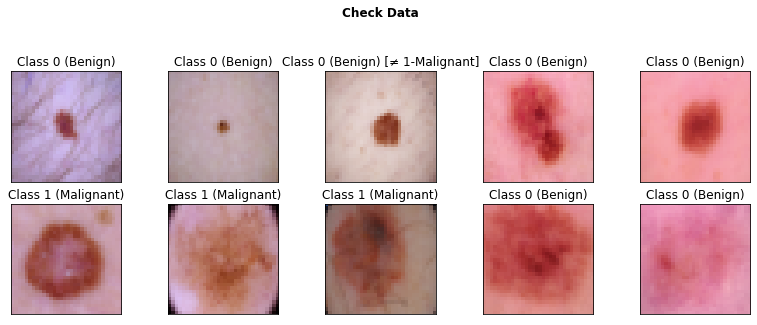

In [400]:
check_ten(X_test, y_pred, y_test_cat, compare = True) 

#### Saving the model

In [401]:
model_vgg16_32.save('vgg16_32_model')
print('Saved model to disk')

# Save model
vgg16_32_model_json = model_vgg16_32.to_json()
with open('vgg16_32_model.json', 'w') as json_file:
     json_file.write(vgg16_32_model_json)

# Save weights
model_vgg16_32.save_weights('vgg16_32_model.h5')
print("Saved model to disk")

INFO:tensorflow:Assets written to: vgg16_32_model/assets
Saved model to disk


/opt/anaconda3/envs/Deeplearning/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


### VGG16 64

#### Build

In [402]:
model_vgg16_64 = VGG16(
    include_top=True,
     weights= None,
     input_tensor=None,
     input_shape=(64,64,3),
     pooling='avg',
     classes=2
)

#### Summary

In [403]:
model_vgg16_64.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

#### Compile

In [404]:
model_vgg16_64.compile(optimizer = Adam(0.00001),
              loss = "binary_crossentropy", 
              metrics=["accuracy"])

#### Training

In [405]:
vgg16_large_history = model_vgg16_64.fit(
    X_train_large,
    y_train_cat_l,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 100,
    verbose = 0, 
    callbacks=[earlystopping, learning_rate_reduction]
)


Epoch 00015: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.

Epoch 00034: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.

Epoch 00039: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-07.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-07.

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-07.

Epoch 00058: ReduceLROnPlateau reducing learning rate to 1e-07.
Restoring model weights from the end of the best epoch: 61.
Epoch 00071: early stopping


#### Model Evaluation

In [407]:
score = model_vgg16_64.evaluate(X_test_large, y_test_cat_l)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

21/21 [==============================] - 7s 310ms/step - loss: 0.3287 - accuracy: 0.8439

Test loss: 0.328654, Test accuracy: 0.843939


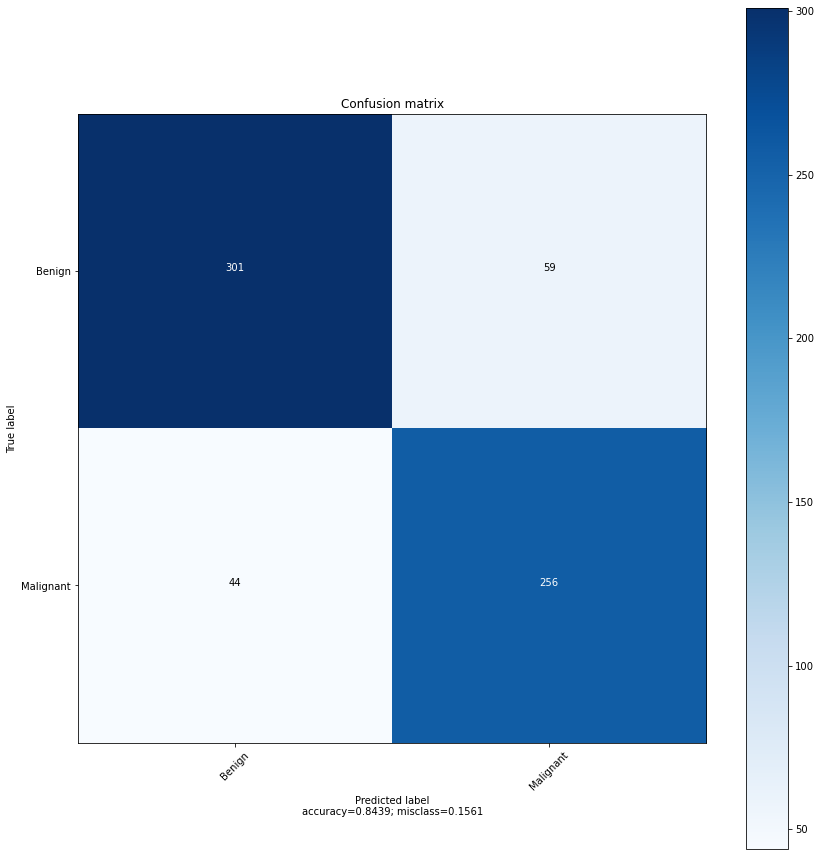

In [408]:
y_pred = np.argmax(model_vgg16_64.predict(X_test_large),axis=1)
y_test_target = np.array([x.argmax() for x in y_test_cat_l])
cm = confusion_matrix(y_test_target, y_pred)
plot_confusion_matrix(cm, class_names, normalize = False)

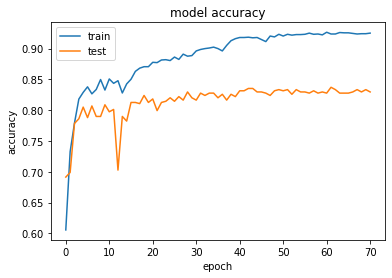

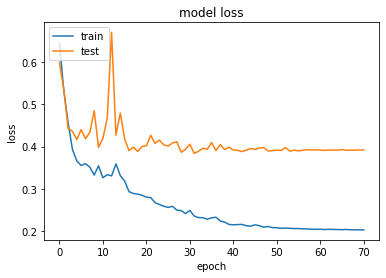

In [409]:
visulization(vgg16_large_history)

#### Model Visulization

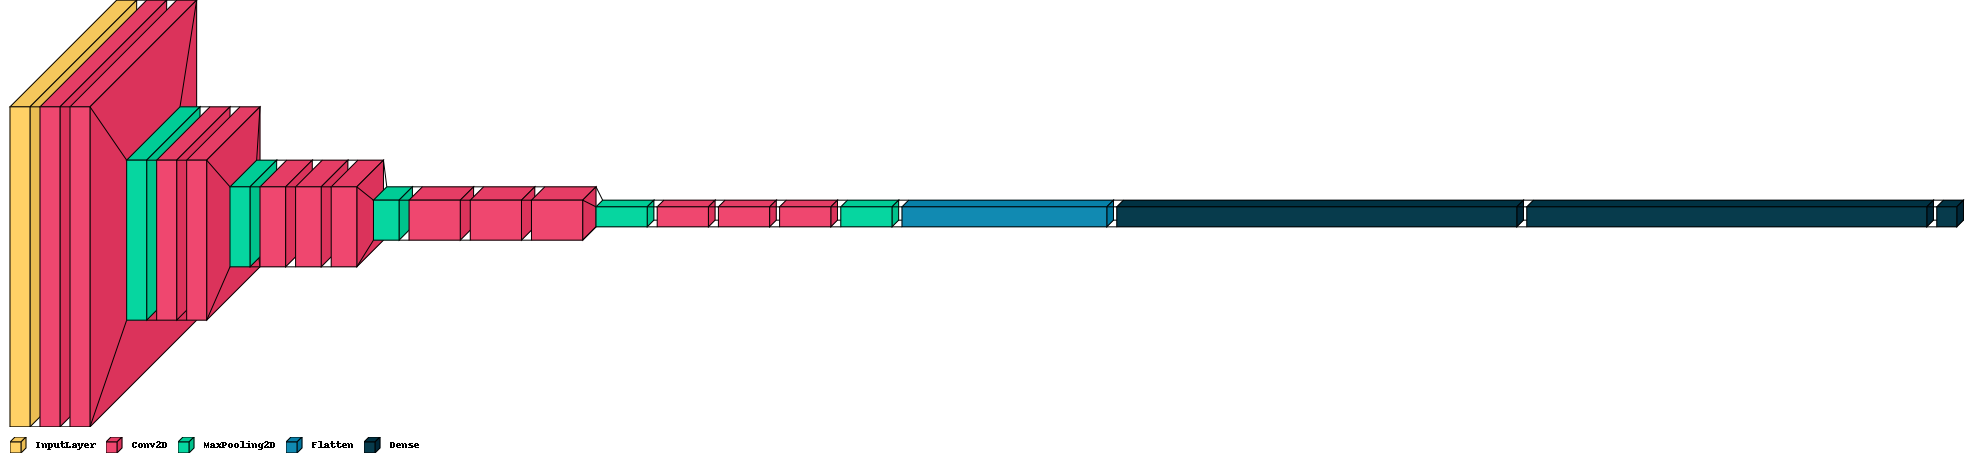

In [501]:
# Visualizing our model 
visualkeras.layered_view(model_vgg16_64, scale_xy = 5, legend=True)

(1, 64, 64, 3)


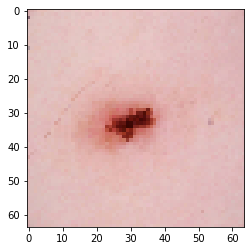

In [410]:
# Pre-processing the image
img = image.load_img('data/test/benign/1.jpg', target_size = (64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

(1, 64, 64, 3)


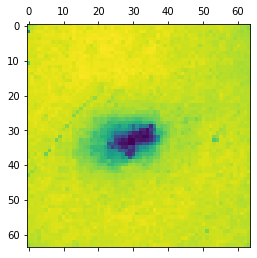

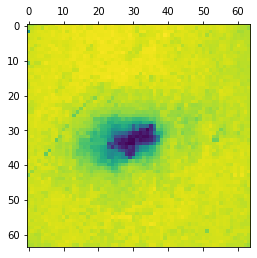

In [411]:
from keras import models
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model_vgg16_64.layers[:8]]
activation_model = Model(inputs = model_vgg16_64.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations of first layer
first_layer_activation = activations[0]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 2], cmap ='viridis')

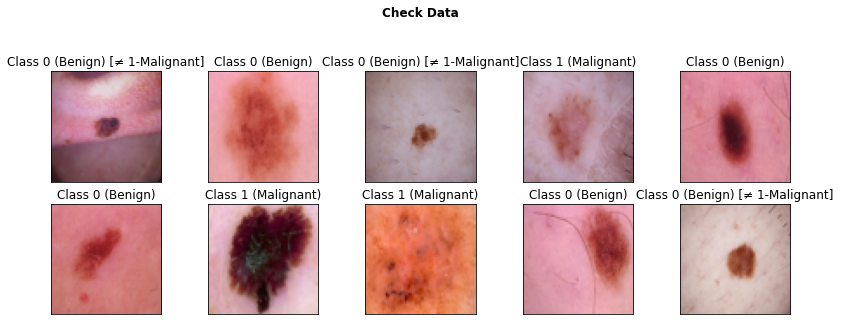

In [412]:
check_ten(X_test_large, y_pred, y_test_cat_l, compare = True) 

#### Saving the model

In [413]:
model_vgg16_64.save('vgg16_64_model')
print('Saved model to disk')

# Save model
vgg16_64_model_json = model_vgg16_64.to_json()
with open('vgg16_32_model.json', 'w') as json_file:
     json_file.write(vgg16_64_model_json)

# Save weights
model_vgg16_64.save_weights('vgg16_64_model.h5')
print("Saved model to disk")

INFO:tensorflow:Assets written to: vgg16_64_model/assets
Saved model to disk
Saved model to disk
